In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from keras.models import Model
from keras.layers import Input, LSTM, Dense, Reshape, Dropout, GRU, Conv2D, Conv1D, TimeDistributed
from tensorflow.keras.layers import BatchNormalization
from tqdm import tqdm
from tensorflow.keras.layers import Input, Dense, Concatenate, Reshape, LSTM, MultiHeadAttention
from tensorflow.keras.layers import Input, Dense, Concatenate, Reshape, LSTM, MultiHeadAttention, Attention, AdditiveAttention
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback


In [2]:
scaler = MinMaxScaler()


def dataset_gen(data_full_df):

    columns_to_normalize = ['Open','High', 'Low', 'Close', 'Volume']
    data_full_df[columns_to_normalize] = scaler.fit_transform(data_full_df[columns_to_normalize])
    data_full_df = data_full_df.drop(columns=['Adj Close'], axis=1)
    print(data_full_df.head(5))
    data_full_np = data_full_df.values

    x_train = []
    y_train = []
    x_test = []
    y_test = []

    last_index = 0
    for i in tqdm(range(0, data_full_np.shape[0] - 300)):
        x_train.append(data_full_np[i:i + 200])
        y_train.append(data_full_np[i + 200:i + 220])
        last_index= i
    x_train = np.array(x_train)
    y_train = np.array(y_train)

    x_test.append( data_full_np[last_index+10: last_index+210])
    y_test.append(data_full_np[last_index+210: last_index+230])
    x_test.append(data_full_np[last_index+40: last_index+240])
    y_test.append(data_full_np[last_index+240: last_index+260])
    x_test.append(data_full_np[last_index+60: last_index+260])
    y_test.append(data_full_np[last_index+260: last_index+280])

    x_test = np.array(x_test)
    y_test = np.array(y_test)

    print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
    return x_train, y_train, x_test, y_test

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
AMZN_df = pd.read_csv('/content/drive/MyDrive/dls_final_pro/AMZN.csv')

print(AMZN_df.info())
print(AMZN_df.describe())

AMZN_x_train, AMZN_y_train, AMZN_x_test, AMZN_y_test = dataset_gen(AMZN_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6022 entries, 0 to 6021
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6022 non-null   object 
 1   Open       6022 non-null   float64
 2   High       6022 non-null   float64
 3   Low        6022 non-null   float64
 4   Close      6022 non-null   float64
 5   Adj Close  6022 non-null   float64
 6   Volume     6022 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 329.5+ KB
None
              Open         High          Low        Close    Adj Close  \
count  6022.000000  6022.000000  6022.000000  6022.000000  6022.000000   
mean     37.637044    38.085257    37.150524    37.627145    37.627145   
std      51.325787    51.931140    50.660187    51.295879    51.295879   
min       0.295500     0.305000     0.275500     0.298500     0.298500   
25%       2.265625     2.300000     2.226125     2.263875     2.263875   
50%      10.167750   

100%|██████████| 5722/5722 [00:00<00:00, 148521.93it/s]


(5722, 200, 6) (5722, 20, 6) (3, 200, 6) (3, 20, 6)


In [4]:
SPX_df = df = pd.read_csv('/content/drive/MyDrive/dls_final_pro/SPX.csv')

print(SPX_df.info())
print(SPX_df.describe())

SPX_x_train, SPX_y_train, SPX_x_test, SPX_y_test = dataset_gen(SPX_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6022 entries, 0 to 6021
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6022 non-null   object 
 1   Open       6022 non-null   float64
 2   High       6022 non-null   float64
 3   Low        6022 non-null   float64
 4   Close      6022 non-null   float64
 5   Adj Close  6022 non-null   float64
 6   Volume     6022 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 329.5+ KB
None
              Open         High          Low        Close    Adj Close  \
count  6022.000000  6022.000000  6022.000000  6022.000000  6022.000000   
mean   1966.479966  1978.106107  1953.972933  1966.739870  1966.739870   
std    1053.525035  1058.846003  1047.942096  1053.737482  1053.737482   
min     679.280029   695.270020   666.789978   676.530029   676.530029   
25%    1191.147522  1198.464966  1183.897553  1191.300018  1191.300018   
50%    1456.320007  1

100%|██████████| 5722/5722 [00:00<00:00, 479976.95it/s]

(5722, 200, 6) (5722, 20, 6) (3, 200, 6) (3, 20, 6)


In [5]:
DUK_df = df = pd.read_csv('/content/drive/MyDrive/dls_final_pro/DUK.csv')

print(DUK_df.info())
print(DUK_df.describe())

DUK_x_train, DUK_y_train, DUK_x_test, DUK_y_test = dataset_gen(DUK_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6022 entries, 0 to 6021
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6022 non-null   object 
 1   Open       6022 non-null   float64
 2   High       6022 non-null   float64
 3   Low        6022 non-null   float64
 4   Close      6022 non-null   float64
 5   Adj Close  6022 non-null   float64
 6   Volume     6022 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 329.5+ KB
None
              Open         High          Low        Close    Adj Close  \
count  6022.000000  6022.000000  6022.000000  6022.000000  6022.000000   
mean     67.037377    67.623590    66.408560    67.033302    44.574863   
std      20.109515    20.235137    19.990161    20.115417    26.139180   
min      21.477455    21.860983    21.285692    21.477455     8.033481   
25%      51.130989    51.608761    50.695164    51.183289    23.198706   
50%      66.946358   

100%|██████████| 5722/5722 [00:00<00:00, 586047.26it/s]

(5722, 200, 6) (5722, 20, 6) (3, 200, 6) (3, 20, 6)


In [6]:
AAPL_df = df = pd.read_csv('/content/drive/MyDrive/dls_final_pro/AAPL.csv')

print(AAPL_df.info())
print(AAPL_df.describe())

AAPL_x_train, AAPL_y_train, AAPL_x_test, AAPL_y_test = dataset_gen(AAPL_df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6022 entries, 0 to 6021
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6022 non-null   object 
 1   Open       6022 non-null   float64
 2   High       6022 non-null   float64
 3   Low        6022 non-null   float64
 4   Close      6022 non-null   float64
 5   Adj Close  6022 non-null   float64
 6   Volume     6022 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 329.5+ KB
None
              Open         High          Low        Close    Adj Close  \
count  6022.000000  6022.000000  6022.000000  6022.000000  6022.000000   
mean     35.440285    35.829528    35.067292    35.464683    34.154099   
std      50.442579    51.011087    49.919386    50.491567    50.278543   
min       0.231964     0.235536     0.227143     0.234286     0.198599   
25%       2.152947     2.188393     2.122500     2.149196     1.821830   
50%      14.394643   

100%|██████████| 5722/5722 [00:00<00:00, 656737.29it/s]

(5722, 200, 6) (5722, 20, 6) (3, 200, 6) (3, 20, 6)


In [7]:
def test2_model(model, x_test_s,x_test_m, y_test, y_test_full):

    for i in range(x_test_s.shape[0]):
        # print(x_test_s[i,:,:].shape)
        # print(x_test_m[i,:,:].shape)
        prediction = model.predict([x_test_s[i,:,:].reshape(1,x_test_s.shape[1],5).astype('float32'), x_test_m[i,:,:].reshape(1,x_test_m.shape[1],5).astype('float32')])
        fig = plt.figure(figsize=(18, 4))

        plt.subplot(1,4,1)
        plt.plot(x_test_s[i,:,0])
        plt.plot(range(len(x_test_s[i, :, 0]), len(x_test_s[i, :, 0]) + len(y_test[i, :, 0])), y_test[i, :, 0], label='ground truth')
        plt.scatter(range(len(x_test_s[i, :, 0]), len(x_test_s[i, :, 0]) + len(y_test[i, :, 0])), prediction[0, :, 0], label='actual prediction', s=1)
        if float(prediction[0, :, 0][0]) > float(x_test_s[i,:,0][-1]):
            prediction[0, :, 0] = prediction[0, :, 0] - (prediction[0, :, 0][0] - x_test_s[i,:,0][-1])
        elif float(prediction[0, :, 0][0]) < float(x_test_s[i,:,0][-1]):
            prediction[0, :, 0] = prediction[0, :, 0] + (x_test_s[i,:,0][-1] - prediction[0, :, 0][0])
        plt.plot(range(len(x_test_s[i, :, 0]), len(x_test_s[i, :, 0]) + len(y_test[i, :, 0])), prediction[0, :, 0], label='adjusted prediction')
        plt.title('Open price from ' + str(y_test_full[i,0,0])+ ' to '+ str( y_test_full[i,-1,0]), fontdict={'size': 10})
        plt.legend()

        plt.subplot(1,4,2)
        plt.plot(x_test_s[i,:,1])
        plt.plot(range(len(x_test_s[i, :, 1]), len(x_test_s[i, :, 1]) + len(y_test[i, :, 1])), y_test[i, :, 1], label='ground truth')
        plt.scatter(range(len(x_test_s[i, :, 1]), len(x_test_s[i, :, 1]) + len(y_test[i, :, 1])), prediction[0, :, 1], label='actual prediction', s=1)
        if float(prediction[0, :, 1][0]) > float(x_test_s[i,:,1][-1]):
            prediction[0, :, 1] = prediction[0, :, 1] - (prediction[0, :, 1][0] - x_test_s[i,:,1][-1])
        elif float(prediction[0, :, 1][0]) < float(x_test_s[i,:,1][-1]):
            prediction[0, :, 1] = prediction[0, :, 1] + (x_test_s[i,:,1][-1] - prediction[0, :, 1][0])
        plt.plot(range(len(x_test_s[i, :, 1]), len(x_test_s[i, :, 1]) + len(y_test[i, :, 1])), prediction[0, :, 1], label='adjusted prediction')
        plt.title('High price from ' + str(y_test_full[i,0,0])+ ' to '+ str( y_test_full[i,-1,0]), fontdict={'size': 10})
        plt.legend()

        plt.subplot(1,4,3)
        plt.plot(x_test_s[i,:,2])
        plt.plot(range(len(x_test_s[i, :, 2]), len(x_test_s[i, :, 2]) + len(y_test[i, :, 2])), y_test[i, :, 2], label='ground truth')
        plt.scatter(range(len(x_test_s[i, :, 2]), len(x_test_s[i, :, 2]) + len(y_test[i, :, 2])), prediction[0, :, 2], label='actual prediction', s=1)
        if float(prediction[0, :, 2][0]) > float(x_test_s[i,:,2][-1]):
            prediction[0, :, 2] = prediction[0, :, 2] - (prediction[0, :, 2][0] - x_test_s[i,:,2][-1])
        elif float(prediction[0, :, 2][0]) < float(x_test_s[i,:,2][-1]):
            prediction[0, :, 2] = prediction[0, :, 2] + (x_test_s[i,:,2][-1] - prediction[0, :, 2][0])
        plt.plot(range(len(x_test_s[i, :, 2]), len(x_test_s[i, :, 2]) + len(y_test[i, :, 2])), prediction[0, :, 2], label='adjusted prediction')
        plt.title('Low price from ' + str(y_test_full[i,0,0])+ ' to '+ str( y_test_full[i,-1,0]), fontdict={'size': 10})
        plt.legend()


        plt.subplot(1,4,4)
        plt.plot(x_test_s[i,:,3])
        plt.plot(range(len(x_test_s[i, :, 3]), len(x_test_s[i, :, 3]) + len(y_test[i, :, 3])), y_test[i, :, 3], label='ground truth')
        plt.scatter(range(len(x_test_s[i, :, 3]), len(x_test_s[i, :, 3]) + len(y_test[i, :, 3])), prediction[0, :, 3], label='actual prediction', s=1)
        if float(prediction[0, :, 3][0]) > float(x_test_s[i,:,3][-1]):
            prediction[0, :, 3] = prediction[0, :, 3] - (prediction[0, :, 3][0] - x_test_s[i,:,3][-1])
        elif float(prediction[0, :, 3][0]) < float(x_test_s[i,:,3][-1]):
            prediction[0, :, 3] = prediction[0, :, 3] + (x_test_s[i,:,3][-1] - prediction[0, :, 3][0])
        plt.plot(range(len(x_test_s[i, :, 3]), len(x_test_s[i, :, 3]) + len(y_test[i, :, 3])), prediction[0, :, 3], label='adjusted prediction')
        plt.title('Close price from ' + str(y_test_full[i,0,0])+ ' to '+ str( y_test_full[i,-1,0]), fontdict={'size': 10})
        plt.legend()

    plt.show()

class CustomCallback2(Callback):
        def __init__(self, model, stock_test_x_data, market_test_x_data, stock_test_y_data):
            self.model = model
            self.stock_test_x_data = stock_test_x_data
            self.market_test_x_data = market_test_x_data
            self.stock_test_y_data = stock_test_y_data


        def on_epoch_end(self, epoch,logs=None):
            test2_model(self.model, self.stock_test_x_data[:,:,1:], self.market_test_x_data[:,:,1:], self.stock_test_y_data[:,:,1:], self.stock_test_y_data[:,:,:])

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 200, 5)]             0         []                            
                                                                                                  
 input_8 (InputLayer)        [(None, 200, 5)]             0         []                            
                                                                                                  
 concatenate_3 (Concatenate  (None, 400, 5)               0         ['input_7[0][0]',             
 )                                                                   'input_8[0][0]']             
                                                                                                  
 lstm_8 (LSTM)               (None, 400, 128)             68608     ['concatenate_3[0][0]'] 

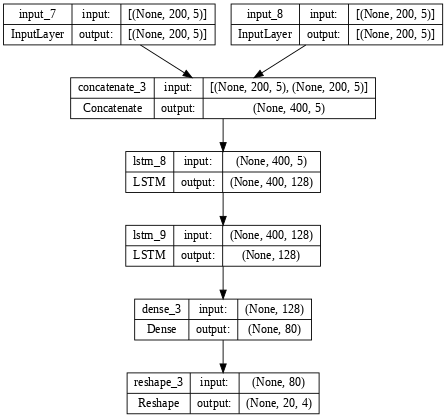

In [14]:
# Define input shape
input_shape = (200, 5)


# Input layer
inputs1 = Input(shape=input_shape)

inputs2 = Input(shape=input_shape)
merged_input = Concatenate(axis=1)([inputs1, inputs2])


lstm1 = LSTM(units=128, activation='tanh', return_sequences=True)(merged_input)
output = LSTM(units=128, activation='tanh')(lstm1)
output = Dense(80)(output)
reshaped_output = Reshape((20, 4))(output)

AMZN_lstm_model_v_a = Model(inputs=[inputs1, inputs2], outputs=reshaped_output)
AMZN_lstm_model_v_a.compile(optimizer=Adam(learning_rate=0.0002), loss='mse')
AMZN_lstm_model_v_a.summary()

tf.keras.utils.plot_model(AMZN_lstm_model_v_a, show_shapes=True, dpi=64)

In [15]:
AMZN_lstm_model_v_a_callback = CustomCallback2(AMZN_lstm_model_v_a, AMZN_x_test[:,:,:], SPX_x_test[:,:,:], AMZN_y_test[:,:,:5])
AMZN_lstm_model_v_a_history = AMZN_lstm_model_v_a.fit([AMZN_x_train[:,:,1:].astype('float32'), SPX_x_train[:,:,1:].astype('float32')], AMZN_y_train[:,:,1:5].astype('float32'), epochs=10, batch_size=1, callbacks=[AMZN_lstm_model_v_a_callback], validation_data=([AMZN_x_test[:,:,1:].astype('float32'), SPX_x_test[:,:,1:].astype('float32')], AMZN_y_test[:,:,1:5].astype('float32')))


print(AMZN_lstm_model_v_a_history.history['val_loss'])
print(AMZN_lstm_model_v_a_history.history['loss'])

plt.plot(AMZN_lstm_model_v_a_history.history['val_loss'])
plt.plot(AMZN_lstm_model_v_a_history.history['loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Validation loss', 'Training loss'])
plt.show()

Output hidden; open in https://colab.research.google.com to view.

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, 200, 5)]             0         []                            
                                                                                                  
 input_10 (InputLayer)       [(None, 200, 5)]             0         []                            
                                                                                                  
 lstm_10 (LSTM)              (None, 200, 128)             68608     ['input_9[0][0]']             
                                                                                                  
 lstm_11 (LSTM)              (None, 200, 128)             68608     ['input_10[0][0]']            
                                                                                            

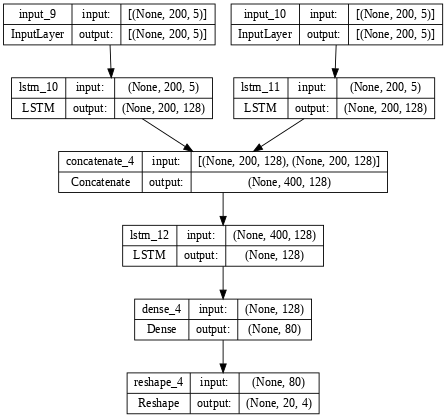

In [16]:
# Define input shape
input_shape = (200, 5)

# Input layer
inputs1 = Input(shape=input_shape)
lstm1 = LSTM(units=128, activation='tanh', return_sequences=True)(inputs1)

inputs2 = Input(shape=input_shape)
lstm2 = LSTM(units=128, activation='tanh', return_sequences=True)(inputs2)

merged_lstm = Concatenate(axis=1)([lstm1, lstm2])
output = LSTM(units=128, activation='tanh')(merged_lstm)
output = Dense(80)(output)
reshaped_output = Reshape((20, 4))(output)

DUK_lstm_model_v_a = Model(inputs=[inputs1, inputs2], outputs=reshaped_output)
DUK_lstm_model_v_a.compile(optimizer=Adam(learning_rate=0.0002), loss='mse')
DUK_lstm_model_v_a.summary()

tf.keras.utils.plot_model(DUK_lstm_model_v_a, show_shapes=True, dpi=64)

In [17]:
DUK_lstm_model_v_a_callback  = CustomCallback2(DUK_lstm_model_v_a, DUK_x_test, SPX_x_test, DUK_y_test)
DUK_lstm_model_v_a_history = DUK_lstm_model_v_a.fit([DUK_x_train[:,:,1:].astype('float32'), SPX_x_train[:,:,1:].astype('float32')], DUK_y_train[:,:,1:5].astype('float32'), epochs=10, batch_size=1, callbacks=[DUK_lstm_model_v_a_callback], validation_data=([DUK_x_test[:,:,1:].astype('float32'), SPX_x_test[:,:,1:].astype('float32')], DUK_y_test[:,:,1:5].astype('float32')))


print(DUK_lstm_model_v_a_history.history['val_loss'])
print(DUK_lstm_model_v_a_history.history['loss'])

plt.plot(DUK_lstm_model_v_a_history.history['val_loss'])
plt.plot(DUK_lstm_model_v_a_history.history['loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Validation loss', 'Training loss'])
plt.show()

Output hidden; open in https://colab.research.google.com to view.

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_11 (InputLayer)       [(None, 200, 5)]             0         []                            
                                                                                                  
 input_12 (InputLayer)       [(None, 200, 5)]             0         []                            
                                                                                                  
 lstm_13 (LSTM)              (None, 200, 128)             68608     ['input_11[0][0]']            
                                                                                                  
 lstm_14 (LSTM)              (None, 200, 128)             68608     ['input_12[0][0]']            
                                                                                            

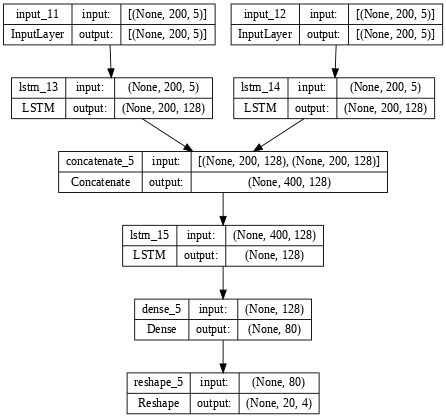

In [18]:
# Define input shape
input_shape = (200, 5)

# Input layer
inputs1 = Input(shape=input_shape)
lstm1 = LSTM(units=128, activation='tanh', return_sequences=True)(inputs1)

inputs2 = Input(shape=input_shape)
lstm2 = LSTM(units=128, activation='tanh', return_sequences=True)(inputs2)

merged_lstm = Concatenate(axis=1)([lstm1, lstm2])
output = LSTM(units=128, activation='tanh')(merged_lstm)
output = Dense(80)(output)
reshaped_output = Reshape((20, 4))(output)

AAPL_lstm_model_v_a = Model(inputs=[inputs1, inputs2], outputs=reshaped_output)
AAPL_lstm_model_v_a.compile(optimizer=Adam(learning_rate=0.0002), loss='mse')
AAPL_lstm_model_v_a.summary()

tf.keras.utils.plot_model(AAPL_lstm_model_v_a, show_shapes=True, dpi=64)

In [19]:
AAPL_lstm_model_v_a_CustomCallback  = CustomCallback2(AAPL_lstm_model_v_a, AAPL_x_test, SPX_x_test, AAPL_y_test)
AAPL_lstm_model_v_a_history = AAPL_lstm_model_v_a.fit([AAPL_x_train[:,:,1:].astype('float32'), SPX_x_train[:,:,1:].astype('float32')], AAPL_y_train[:,:,1:5].astype('float32'), epochs=10, batch_size=1, callbacks=[AAPL_lstm_model_v_a_CustomCallback], validation_data=([AAPL_x_test[:,:,1:].astype('float32'), SPX_x_test[:,:,1:].astype('float32')], AAPL_y_test[:,:,1:5].astype('float32')))


print(AAPL_lstm_model_v_a_history.history['val_loss'])
print(AAPL_lstm_model_v_a_history.history['loss'])

plt.plot(AAPL_lstm_model_v_a_history.history['val_loss'])
plt.plot(AAPL_lstm_model_v_a_history.history['loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Validation loss', 'Training loss'])
plt.show()

Output hidden; open in https://colab.research.google.com to view.